In [194]:
import os
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [195]:
df = pd.read_csv(os.path.join('.', '', 'abalone-data.csv'))

In [196]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Approximate abalone dating rule: Age = Rings + 1.5

In [266]:
df.dropna(inplace = True) # Let's drop the NaN (none should exist in this dataset)

In [262]:
df.columns

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings', u'Volume',
       u'VolumeCubed'],
      dtype='object')

In [263]:
df.Rings.value_counts()

9     689
10    634
8     567
11    487
7     391
     ... 
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [264]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Volume,VolumeCubed
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464,0.917938,0.917938
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418,0.923382,0.923382
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625,0.905696,0.905696
WholeWeight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151,0.959919,0.959919
ShuckedWeight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597,0.923029,0.923029
VisceraWeight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562,0.933806,0.933806
ShellWeight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928,0.939090,0.939090
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000,0.544709,0.544709
Volume,0.917938,0.923382,0.905696,0.959919,0.923029,0.933806,0.939090,0.544709,1.000000,1.000000
VolumeCubed,0.917938,0.923382,0.905696,0.959919,0.923029,0.933806,0.939090,0.544709,1.000000,1.000000


In [200]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [201]:
df.Diameter.unique()

array([ 0.365,  0.265,  0.42 ,  0.255,  0.3  ,  0.415,  0.425,  0.37 ,
        0.44 ,  0.38 ,  0.35 ,  0.405,  0.355,  0.4  ,  0.28 ,  0.34 ,
        0.295,  0.32 ,  0.275,  0.48 ,  0.45 ,  0.445,  0.475,  0.47 ,
        0.56 ,  0.525,  0.55 ,  0.29 ,  0.335,  0.175,  0.15 ,  0.375,
        0.245,  0.41 ,  0.36 ,  0.31 ,  0.385,  0.19 ,  0.345,  0.325,
        0.495,  0.39 ,  0.235,  0.51 ,  0.465,  0.535,  0.435,  0.43 ,
        0.395,  0.305,  0.195,  0.54 ,  0.26 ,  0.2  ,  0.33 ,  0.23 ,
        0.285,  0.52 ,  0.455,  0.205,  0.13 ,  0.5  ,  0.515,  0.485,
        0.46 ,  0.545,  0.57 ,  0.575,  0.16 ,  0.21 ,  0.49 ,  0.25 ,
        0.27 ,  0.505,  0.215,  0.225,  0.055,  0.1  ,  0.09 ,  0.12 ,
        0.53 ,  0.145,  0.22 ,  0.6  ,  0.58 ,  0.585,  0.565,  0.555,
        0.185,  0.165,  0.125,  0.59 ,  0.14 ,  0.11 ,  0.155,  0.315,
        0.24 ,  0.17 ,  0.18 ,  0.105,  0.595,  0.135,  0.625,  0.63 ,
        0.61 ,  0.65 ,  0.62 ,  0.605,  0.095,  0.115,  0.615])

In [202]:
df.Height.unique()

array([ 0.095,  0.09 ,  0.135,  0.125,  0.08 ,  0.15 ,  0.14 ,  0.11 ,
        0.145,  0.1  ,  0.13 ,  0.085,  0.155,  0.165,  0.185,  0.18 ,
        0.175,  0.2  ,  0.105,  0.045,  0.055,  0.05 ,  0.12 ,  0.07 ,
        0.16 ,  0.06 ,  0.17 ,  0.195,  0.19 ,  0.115,  0.075,  0.065,
        0.215,  0.21 ,  0.23 ,  0.205,  0.22 ,  0.04 ,  0.01 ,  0.03 ,
        0.035,  0.225,  0.24 ,  0.235,  0.02 ,  0.025,  0.015,  0.   ,
        0.515,  0.25 ,  1.13 ])

Height has bad "0." values.

In [281]:
df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Volume,VolumeCubed
0,M,0.455,0.365,0.095,0.5140,...,0.1010,0.1500,15,0.015777,0.015777
1,M,0.350,0.265,0.090,0.2255,...,0.0485,0.0700,7,0.008347,0.008347
2,F,0.530,0.420,0.135,0.6770,...,0.1415,0.2100,9,0.030051,0.030051
3,M,0.440,0.365,0.125,0.5160,...,0.1140,0.1550,10,0.020075,0.020075
4,I,0.330,0.255,0.080,0.2050,...,0.0395,0.0550,7,0.006732,0.006732
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,...,0.2390,0.2490,11,0.041951,0.041951
4173,M,0.590,0.440,0.135,0.9660,...,0.2145,0.2605,10,0.035046,0.035046
4174,M,0.600,0.475,0.205,1.1760,...,0.2875,0.3080,9,0.058425,0.058425
4175,F,0.625,0.485,0.150,1.0945,...,0.2610,0.2960,10,0.045469,0.045469


In [204]:
# Drop the 0. Height value(s)
df = df[df.Height != 0.]

In [265]:
df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Volume,VolumeCubed
0,M,0.455,0.365,0.095,0.5140,...,0.1010,0.1500,15,0.015777,0.015777
1,M,0.350,0.265,0.090,0.2255,...,0.0485,0.0700,7,0.008347,0.008347
2,F,0.530,0.420,0.135,0.6770,...,0.1415,0.2100,9,0.030051,0.030051
3,M,0.440,0.365,0.125,0.5160,...,0.1140,0.1550,10,0.020075,0.020075
4,I,0.330,0.255,0.080,0.2050,...,0.0395,0.0550,7,0.006732,0.006732
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,...,0.2390,0.2490,11,0.041951,0.041951
4173,M,0.590,0.440,0.135,0.9660,...,0.2145,0.2605,10,0.035046,0.035046
4174,M,0.600,0.475,0.205,1.1760,...,0.2875,0.3080,9,0.058425,0.058425
4175,F,0.625,0.485,0.150,1.0945,...,0.2610,0.2960,10,0.045469,0.045469


In [206]:
df.Height.unique()

array([ 0.095,  0.09 ,  0.135,  0.125,  0.08 ,  0.15 ,  0.14 ,  0.11 ,
        0.145,  0.1  ,  0.13 ,  0.085,  0.155,  0.165,  0.185,  0.18 ,
        0.175,  0.2  ,  0.105,  0.045,  0.055,  0.05 ,  0.12 ,  0.07 ,
        0.16 ,  0.06 ,  0.17 ,  0.195,  0.19 ,  0.115,  0.075,  0.065,
        0.215,  0.21 ,  0.23 ,  0.205,  0.22 ,  0.04 ,  0.01 ,  0.03 ,
        0.035,  0.225,  0.24 ,  0.235,  0.02 ,  0.025,  0.015,  0.515,
        0.25 ,  1.13 ])

Confirmed that the 0 value is gone.

In [207]:
df.Length.unique()

array([ 0.455,  0.35 ,  0.53 ,  0.44 ,  0.33 ,  0.425,  0.545,  0.475,
        0.55 ,  0.525,  0.43 ,  0.49 ,  0.535,  0.47 ,  0.5  ,  0.355,
        0.365,  0.45 ,  0.38 ,  0.565,  0.615,  0.56 ,  0.58 ,  0.59 ,
        0.605,  0.575,  0.68 ,  0.665,  0.705,  0.465,  0.54 ,  0.24 ,
        0.205,  0.21 ,  0.39 ,  0.46 ,  0.325,  0.52 ,  0.4  ,  0.485,
        0.405,  0.445,  0.245,  0.505,  0.595,  0.31 ,  0.555,  0.57 ,
        0.6  ,  0.62 ,  0.625,  0.695,  0.36 ,  0.51 ,  0.435,  0.495,
        0.385,  0.515,  0.37 ,  0.27 ,  0.375,  0.7  ,  0.71 ,  0.265,
        0.305,  0.345,  0.65 ,  0.28 ,  0.175,  0.17 ,  0.635,  0.645,
        0.61 ,  0.725,  0.235,  0.315,  0.225,  0.64 ,  0.63 ,  0.585,
        0.42 ,  0.335,  0.415,  0.275,  0.295,  0.075,  0.13 ,  0.11 ,
        0.16 ,  0.23 ,  0.3  ,  0.32 ,  0.655,  0.66 ,  0.2  ,  0.165,
        0.19 ,  0.74 ,  0.34 ,  0.675,  0.745,  0.685,  0.69 ,  0.67 ,
        0.29 ,  0.26 ,  0.395,  0.41 ,  0.22 ,  0.255,  0.735,  0.155,
      

In [208]:
print df.ShellWeight.unique()
print df.VisceraWeight.unique()
print df.WholeWeight.unique()
print df.ShuckedWeight.unique()

[ 0.15    0.07    0.21    0.155   0.055   0.12    0.33    0.26    0.165
  0.32    0.135   0.19    0.205   0.185   0.24    0.115   0.13    0.1
  0.075   0.085   0.27    0.2     0.305   0.3     0.285   0.28    0.295
  0.46    0.35    0.455   0.49    0.125   0.34    0.145   0.09    0.02
  0.012   0.015   0.14    0.045   0.245   0.16    0.11    0.22    0.17
  0.025   0.175   0.485   0.275   0.425   0.38    0.315   0.345   0.675
  0.58    0.36    0.44    0.4     0.255   0.39    0.48    0.25    0.335
  0.235   0.105   0.18    0.31    0.03    0.08    0.54    0.78    0.41
  0.129   0.062   0.068   0.028   0.1355  0.048   0.063   0.117   0.0925
  0.2475  0.2665  0.4465  0.2425  0.174   0.1565  0.042   0.0125  0.01
  0.325   0.45    0.355   0.635   1.005   0.815   0.725   0.85    0.65
  0.76    0.62    0.59    0.035   0.05    0.57    0.29    0.195   0.465
  0.23    0.06    0.435   0.04    0.0015  0.004   0.003   0.005   0.37
  0.365   0.026   0.0905  0.55    0.385   0.585   0.69    0.43    0.225

In [209]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [301]:
df.Sex.value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

In [311]:
# Separate Sex values to adult/non-adult
#df.StationType = df.StationType.apply(lambda value: 'C' if "Davis" in value else value)
#isAdult = df.Sex.apply(lambda value: 0 if 'I' in value else 1)
#df.append(isAdult)
#df = df.copy()
#df['isAdult'] = df.isAdult
#merge(df, isAdult, on='key')
#df[ ['isAdult'] ] = df[ ['Volume'] ].apply(np.log)

#df

NameError: name 'merge' is not defined

In [310]:
isAdult

0       1
1       1
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    1
Name: Sex, dtype: int64

In [309]:
df.columns

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings', u'Volume',
       u'VolumeCubed', u'VolumeLog'],
      dtype='object')

In [303]:
df

,Sex,Length,Diameter,Height,WholeWeight,...,ShellWeight,Rings,Volume,VolumeCubed,VolumeLog
0,M,0.455,0.365,0.095,0.5140,...,0.1500,15,0.015777,0.015777,-4.149194
1,M,0.350,0.265,0.090,0.2255,...,0.0700,7,0.008347,0.008347,-4.785793
2,F,0.530,0.420,0.135,0.6770,...,0.2100,9,0.030051,0.030051,-3.504859
3,M,0.440,0.365,0.125,0.5160,...,0.1550,10,0.020075,0.020075,-3.908280
4,I,0.330,0.255,0.080,0.2050,...,0.0550,7,0.006732,0.006732,-5.000883
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,...,0.2490,11,0.041951,0.041951,-3.171247
4173,M,0.590,0.440,0.135,0.9660,...,0.2605,10,0.035046,0.035046,-3.351094
4174,M,0.600,0.475,0.205,1.1760,...,0.3080,9,0.058425,0.058425,-2.840011
4175,F,0.625,0.485,0.150,1.0945,...,0.2960,10,0.045469,0.045469,-3.090730


## Plot the Data

In [210]:
#df.SexNum = df.StationType.apply(lambda value: 'C' if "Davis" in value else value)

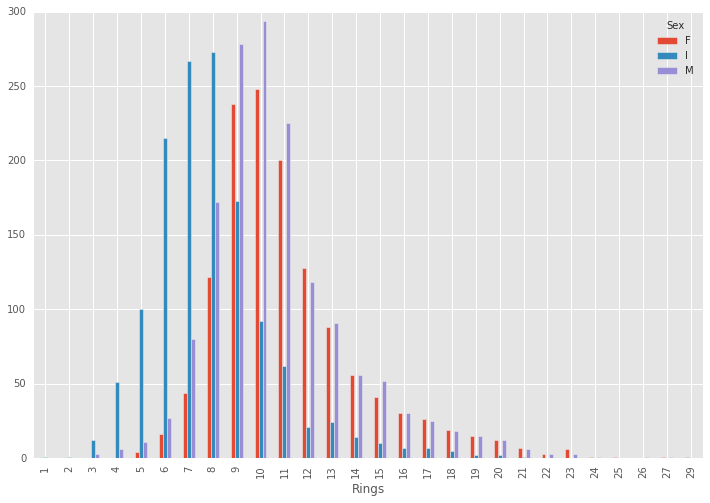

In [211]:
dfSex = df.groupby(['Rings', 'Sex']).size()
dfSex=dfSex.unstack()
dfSex.plot(kind='bar', figsize = (12, 8))

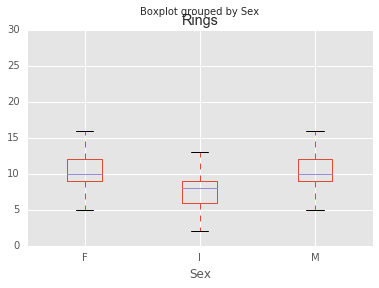

In [212]:
df.boxplot('Rings', by = 'Sex')

In [214]:
#dfCheckSex = df[df.Sex == 'I' and df.Rings > 20].any()
#dfCheckSex
# def blah(df):
#     if df.Sex == 'I' and df.Rings > 20:
#         dfSexCheck = df
# blah(df)
# dfSexCheck

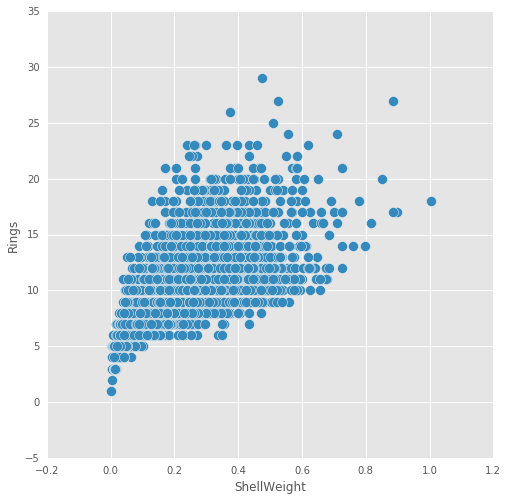

In [215]:
df[ ['Rings', 'ShellWeight'] ].plot(kind = 'scatter', x = 'ShellWeight', y = 'Rings', s = 100, figsize = (8, 8))

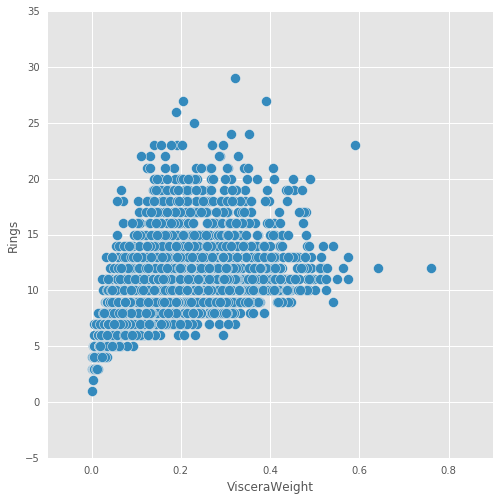

In [216]:
df[ ['Rings', 'VisceraWeight'] ].plot(kind = 'scatter', x = 'VisceraWeight', y = 'Rings', s = 100, figsize = (8, 8))

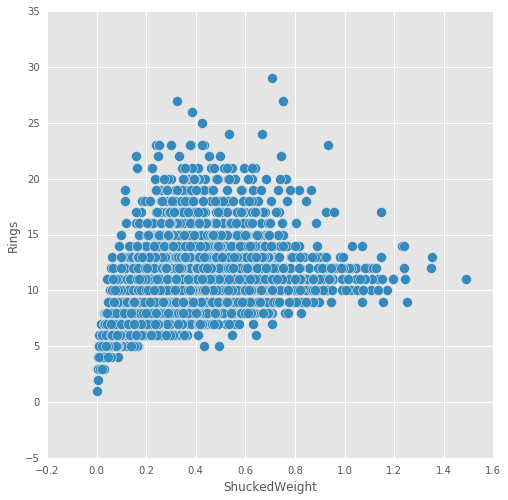

In [217]:
df[ ['Rings', 'ShuckedWeight'] ].plot(kind = 'scatter', x = 'ShuckedWeight', y = 'Rings', s = 100, figsize = (8, 8))

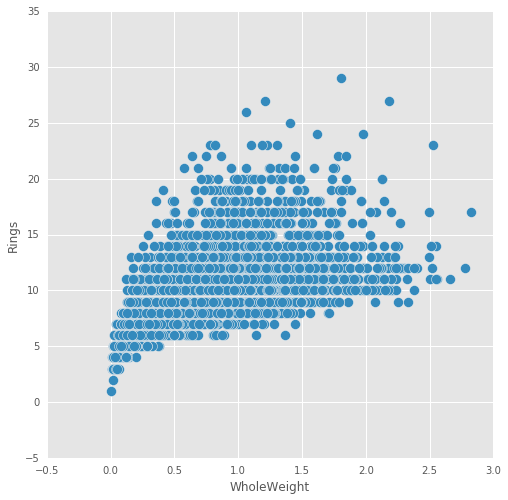

In [218]:
df[ ['Rings', 'WholeWeight'] ].plot(kind = 'scatter', x = 'WholeWeight', y = 'Rings', s = 100, figsize = (8, 8))

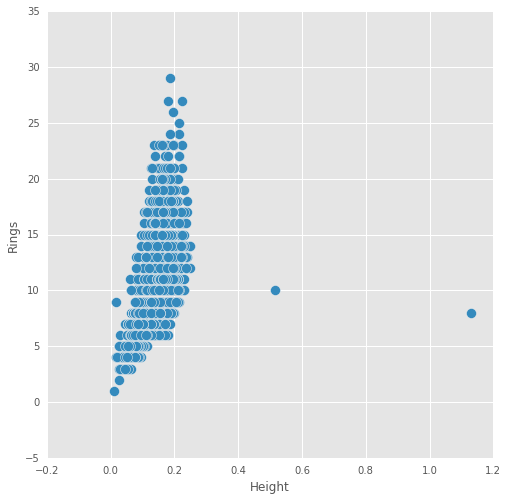

In [219]:
df[ ['Rings', 'Height'] ].plot(kind = 'scatter', x = 'Height', y = 'Rings', s = 100, figsize = (8, 8))

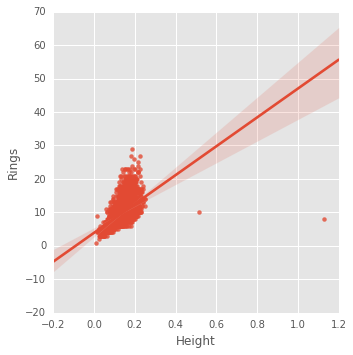

In [220]:
sns.lmplot('Height', 'Rings', df)

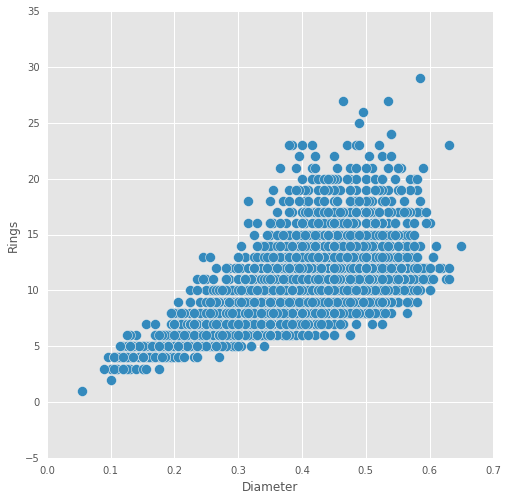

In [221]:
df[ ['Rings', 'Diameter'] ].plot(kind = 'scatter', x = 'Diameter', y = 'Rings', s = 100, figsize = (8, 8))

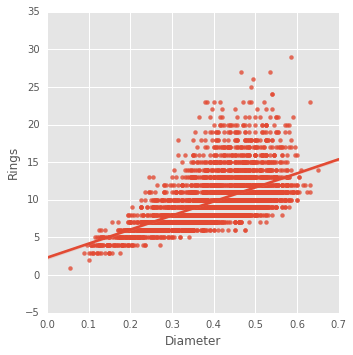

In [222]:
sns.lmplot('Diameter', 'Rings', df)

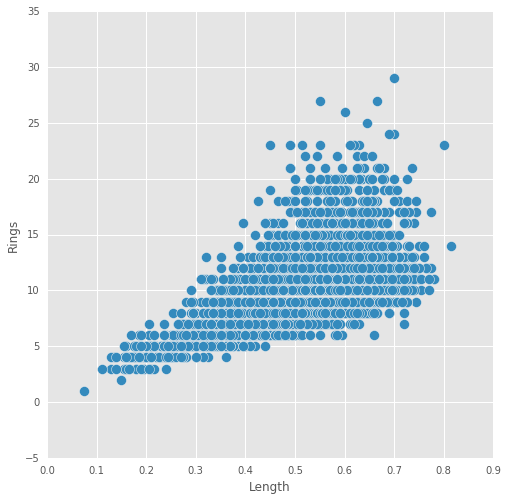

In [223]:
df[ ['Rings', 'Length'] ].plot(kind = 'scatter', x = 'Length', y = 'Rings', s = 100, figsize = (8, 8))

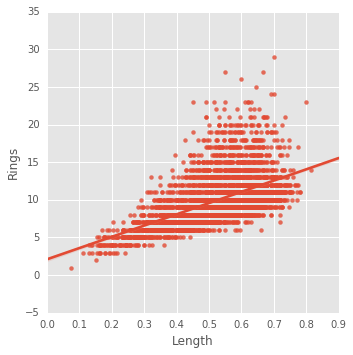

In [224]:
sns.lmplot('Length', 'Rings', df)

In [225]:
def transform_variables(df):
    df.Volume = df.Length * df.Diameter * df.Height
    df.VolumeCube = df.Volume ** 1/3

transform_variables(df)
dfV = df.Volume
dfVC = df.VolumeCube

In [226]:
dfVC

0       0.005259
1       0.002782
2       0.010017
3       0.006692
4       0.002244
          ...   
4172    0.013984
4173    0.011682
4174    0.019475
4175    0.015156
4176    0.025613
dtype: float64

In [282]:
# Add volume column onto df
df = df.copy()
df['Volume'] = dfV
df['VolumeCubed'] = dfV

df[ ['VolumeLog'] ] = df[ ['Volume'] ].apply(np.log)

df

,Sex,Length,Diameter,Height,WholeWeight,...,ShellWeight,Rings,Volume,VolumeCubed,VolumeLog
0,M,0.455,0.365,0.095,0.5140,...,0.1500,15,0.015777,0.015777,-4.149194
1,M,0.350,0.265,0.090,0.2255,...,0.0700,7,0.008347,0.008347,-4.785793
2,F,0.530,0.420,0.135,0.6770,...,0.2100,9,0.030051,0.030051,-3.504859
3,M,0.440,0.365,0.125,0.5160,...,0.1550,10,0.020075,0.020075,-3.908280
4,I,0.330,0.255,0.080,0.2050,...,0.0550,7,0.006732,0.006732,-5.000883
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,...,0.2490,11,0.041951,0.041951,-3.171247
4173,M,0.590,0.440,0.135,0.9660,...,0.2605,10,0.035046,0.035046,-3.351094
4174,M,0.600,0.475,0.205,1.1760,...,0.3080,9,0.058425,0.058425,-2.840011
4175,F,0.625,0.485,0.150,1.0945,...,0.2960,10,0.045469,0.045469,-3.090730


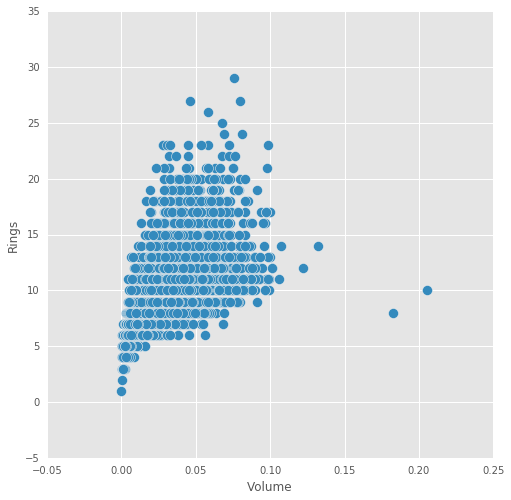

In [228]:
df[ ['Rings', 'Volume'] ].plot(kind = 'scatter', x = 'Volume', y = 'Rings', s = 100, figsize = (8, 8))

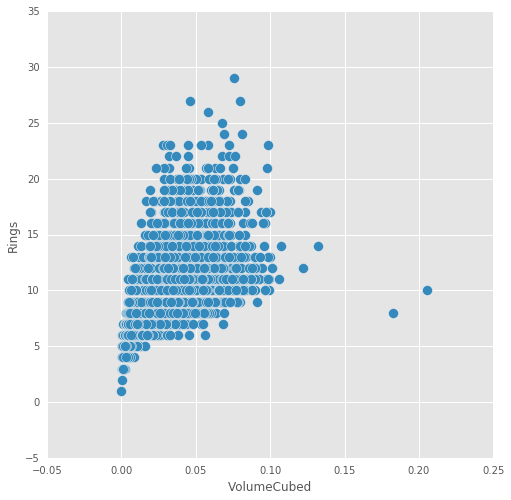

In [229]:
df[ ['Rings', 'VolumeCubed'] ].plot(kind = 'scatter', x = 'VolumeCubed', y = 'Rings', s = 100, figsize = (8, 8))

## Models

In [230]:
df.columns

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings', u'Volume',
       u'VolumeCubed'],
      dtype='object')

In [255]:
model_1 = smf.ols(formula = 'Rings ~ 0 + Length * Diameter * Height * ShuckedWeight', data = df).fit().summary()
model_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     4850.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:39:04   Log-Likelihood:                -9629.7
No. Observations:                4175   AIC:                         1.929e+04
Df Residuals:                    4160   BIC:                         1.938e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Length                                   5.7692     13.657      0.422      0.673       -21.006    32.544
Diameter                                30.3368     19.384      1.565      0.118        -7.667    68.340
Length:Diameter                        -77.5371     13.797     -5.620      0.000      -104.587   -50.487
Height                                 -60.4042     19.826     -3.047      0.002       -99.273   -21.535
Length:Height                          163.8959    113.738      1.441      0.150       -59.091   386.883
Diameter:Height                        306.7889    153.616      1.997      0.046         5.619   607.959
Length:Diameter:Height                -211.6101     70.863     -2.986      0.003      -350.539   -72.681
ShuckedWeight                           33.1821     16.862      1.968      0.049         0.123    66.241
Length:ShuckedWeight                    -7.6469     51.664     -0.148      0.882      -108.935    93.641
Diameter:ShuckedWeight                 -59.0440     68.967     -0.856      0.392      -194.257    76.169
Length:Diameter:ShuckedWeight           57.6179     66.066      0.872      0.383       -71.908   187.144
Height:ShuckedWeight                  -688.8484    121.659     -5.662      0.000      -927.366  -450.331
Length:Height:ShuckedWeight            623.5516    291.038      2.143      0.032        52.961  1194.142
Diameter:Height:ShuckedWeight          892.9565    386.228      2.312      0.021       135.744  1650.169
Length:Diameter:Height:ShuckedWeight  -960.2351    366.829     -2.618      0.009     -1679.416  -241.055
==============================================================================
Omnibus:                     1221.053   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3782.131
Skew:                           1.494   Prob(JB):                         0.00
Kurtosis:                       6.579   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [256]:
model_2 = smf.ols(formula = 'Rings ~ 0 + Length * Diameter * Height * WholeWeight', data = df).fit().summary()
model_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4434.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:39:09   Log-Likelihood:                -9806.4
No. Observations:                4175   AIC:                         1.964e+04
Df Residuals:                    4160   BIC:                         1.974e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Length                                 4.1603     15.116      0.275      0.783       -25.476    33.796
Diameter                              48.4463     21.581      2.245      0.025         6.136    90.756
Length:Diameter                     -112.6591     18.207     -6.188      0.000      -148.355   -76.963
Height                               -72.6202     22.017     -3.298      0.001      -115.785   -29.455
Length:Height                        148.9960    136.575      1.091      0.275      -118.764   416.756
Diameter:Height                      119.8578    185.925      0.645      0.519      -244.655   484.370
Length:Diameter:Height                64.1965     94.264      0.681      0.496      -120.611   249.004
WholeWeight                           34.0842     11.550      2.951      0.003        11.439    56.729
Length:WholeWeight                   -23.9263     28.000     -0.855      0.393       -78.820    30.968
Diameter:WholeWeight                 -64.1424     37.046     -1.731      0.083      -136.772     8.487
Length:Diameter:WholeWeight           78.9683     39.644      1.992      0.046         1.246   156.691
Height:WholeWeight                  -157.8976     78.012     -2.024      0.043      -310.844    -4.952
Length:Height:WholeWeight             55.8619    156.153      0.358      0.721      -250.281   362.004
Diameter:Height:WholeWeight          338.8938    195.943      1.730      0.084       -45.259   723.046
Length:Diameter:Height:WholeWeight  -324.2672    210.715     -1.539      0.124      -737.381    88.846
==============================================================================
Omnibus:                     1263.341   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4089.212
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                       6.761   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
model_3 = smf.ols(formula = 'Rings ~ 0 + Length * Diameter * Height + VisceraWeight', data = df).fit().summary()
model_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     8095.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:58:53   Log-Likelihood:                -9862.0
No. Observations:                4175   AIC:                         1.974e+04
Df Residuals:                    4167   BIC:                         1.979e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Length                     7.8099      8.529      0.916      0.360        -8.911    24.531
Diameter                  29.4982     11.783      2.504      0.012         6.398    52.598
Length:Diameter          -42.0711      6.334     -6.642      0.000       -54.490   -29.652
Height                   -29.4859     11.487     -2.567      0.010       -52.006    -6.966
Length:Height              3.6925     56.855      0.065      0.948      -107.774   115.159
Diameter:Height          148.9777     79.363      1.877      0.061        -6.617   304.572
Length:Diameter:Height   -55.5929     28.554     -1.947      0.052      -111.574     0.388
VisceraWeight              0.3285      1.151      0.285      0.775        -1.928     2.585
==============================================================================
Omnibus:                     1308.925   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5031.590
Skew:                           1.517   Prob(JB):                         0.00
Kurtosis:                       7.441   Cond. No.                     1.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
model_4 = smf.ols(formula = 'Rings ~ 0 + Length * Diameter * Height * ShellWeight', data = df).fit().summary()
model_4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     5428.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:39:20   Log-Likelihood:                -9406.7
No. Observations:                4175   AIC:                         1.884e+04
Df Residuals:                    4160   BIC:                         1.894e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Length                                 7.8250     13.482      0.580      0.562       -18.607    34.257
Diameter                              26.5086     19.410      1.366      0.172       -11.546    64.564
Length:Diameter                      -54.4149     15.140     -3.594      0.000       -84.097   -24.733
Height                                18.5516     20.279      0.915      0.360       -21.206    58.309
Length:Height                       -113.2063    121.483     -0.932      0.351      -351.377   124.965
Diameter:Height                      -52.9043    164.097     -0.322      0.747      -374.621   268.813
Length:Diameter:Height               295.1808     74.370      3.969      0.000       149.376   440.986
ShellWeight                           71.0358     35.860      1.981      0.048         0.731   141.341
Length:ShellWeight                    -6.1953     89.288     -0.069      0.945      -181.248   168.858
Diameter:ShellWeight                -175.3986    114.074     -1.538      0.124      -399.045    48.248
Length:Diameter:ShellWeight          152.6691    115.998      1.316      0.188       -74.749   380.088
Height:ShellWeight                   432.3726    249.551      1.733      0.083       -56.881   921.626
Length:Height:ShellWeight           -906.7916    505.758     -1.793      0.073     -1898.348    84.765
Diameter:Height:ShellWeight         -128.6507    611.207     -0.210      0.833     -1326.944  1069.643
Length:Diameter:Height:ShellWeight   554.2288    648.759      0.854      0.393      -717.685  1826.142
==============================================================================
Omnibus:                     1103.952   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3741.060
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       6.826   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
model_5 = smf.ols(formula = 'Rings ~ 0 + Volume * ShellWeight', data = df).fit().summary()
model_5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:38:55   Log-Likelihood:                -10546.
No. Observations:                4175   AIC:                         2.110e+04
Df Residuals:                    4172   BIC:                         2.112e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Volume                78.1227      6.730     11.609      0.000        64.929    91.316
ShellWeight           51.4511      0.966     53.244      0.000        49.557    53.346
Volume:ShellWeight  -514.4893      8.709    -59.072      0.000      -531.564  -497.414
==============================================================================
Omnibus:                      387.775   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.854
Skew:                           0.684   Prob(JB):                    9.25e-136
Kurtosis:                       4.306   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
model_6 = smf.ols(formula = 'Rings ~ 0 + VolumeCubed * ShellWeight', data = df).fit().summary()
model_6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:38:50   Log-Likelihood:                -10546.
No. Observations:                4175   AIC:                         2.110e+04
Df Residuals:                    4172   BIC:                         2.112e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
VolumeCubed                78.1227      6.730     11.609      0.000        64.929    91.316
ShellWeight                51.4511      0.966     53.244      0.000        49.557    53.346
VolumeCubed:ShellWeight  -514.4893      8.709    -59.072      0.000      -531.564  -497.414
==============================================================================
Omnibus:                      387.775   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.854
Skew:                           0.684   Prob(JB):                    9.25e-136
Kurtosis:                       4.306   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
model_6 = smf.ols(formula = 'Rings ~ 0 + Height * WholeWeight', data = df).fit().summary()
model_6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.986e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:38:43   Log-Likelihood:                -10027.
No. Observations:                4175   AIC:                         2.006e+04
Df Residuals:                    4172   BIC:                         2.008e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Height                62.5483      0.916     68.249      0.000        60.751    64.345
WholeWeight            7.4577      0.315     23.713      0.000         6.841     8.074
Height:WholeWeight   -38.4468      1.410    -27.265      0.000       -41.211   -35.682
==============================================================================
Omnibus:                     1076.596   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47426.893
Skew:                           0.448   Prob(JB):                         0.00
Kurtosis:                      19.487   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
model_7 = smf.ols(formula = 'Rings ~ 0 + Length + Height + Diameter + ShuckedWeight', data = df).fit().summary()
model_7

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.720e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:36:23   Log-Likelihood:                -9744.4
No. Observations:                4175   AIC:                         1.950e+04
Df Residuals:                    4171   BIC:                         1.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Length           -6.1655      1.840     -3.350      0.001        -9.774    -2.557
Height           23.7034      1.692     14.006      0.000        20.385    27.021
Diameter         29.8036      2.444     12.196      0.000        25.013    34.595
ShuckedWeight    -6.3585      0.269    -23.673      0.000        -6.885    -5.832
==============================================================================
Omnibus:                     1289.512   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7288.116
Skew:                           1.356   Prob(JB):                         0.00
Kurtosis:                       8.877   Cond. No.                         63.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
model_8 = smf.ols(formula = 'Rings ~ 0 + Length + Height + Diameter + WholeWeight', data = df).fit().summary()
model_8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:40:04   Log-Likelihood:                -9938.3
No. Observations:                4175   AIC:                         1.988e+04
Df Residuals:                    4171   BIC:                         1.991e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Length         -4.2776      1.953     -2.190      0.029        -8.106    -0.449
Height         22.8071      1.790     12.744      0.000        19.299    26.316
Diameter       25.2342      2.601      9.701      0.000        20.134    30.334
WholeWeight    -1.6277      0.137    -11.864      0.000        -1.897    -1.359
==============================================================================
Omnibus:                     1255.855   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5973.157
Skew:                           1.374   Prob(JB):                         0.00
Kurtosis:                       8.176   Cond. No.                         93.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
model_9 = smf.ols(formula = 'Rings ~ 0 + Length + Height + Diameter + VisceraWeight', data = df).fit().summary()
model_9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.578e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:40:19   Log-Likelihood:                -9914.2
No. Observations:                4175   AIC:                         1.984e+04
Df Residuals:                    4171   BIC:                         1.986e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Length           -3.8232      1.923     -1.989      0.047        -7.593    -0.054
Height           23.1720      1.776     13.045      0.000        19.689    26.655
Diameter         24.7846      2.550      9.718      0.000        19.785    29.785
VisceraWeight    -8.0142      0.580    -13.809      0.000        -9.152    -6.876
==============================================================================
Omnibus:                     1211.029   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5806.431
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       8.141   Cond. No.                         57.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
model_10 = smf.ols(formula = 'Rings ~ 0 + Length + Height * Diameter', data = df).fit().summary()
model_10

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:41:25   Log-Likelihood:                -9889.5
No. Observations:                4175   AIC:                         1.979e+04
Df Residuals:                    4171   BIC:                         1.981e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Length            -12.4595      2.068     -6.024      0.000       -16.514    -8.405
Height             44.4991      2.389     18.630      0.000        39.816    49.182
Diameter           33.8274      2.706     12.501      0.000        28.522    39.133
Height:Diameter   -58.8985      3.780    -15.581      0.000       -66.309   -51.488
==============================================================================
Omnibus:                     1317.527   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7175.482
Skew:                           1.402   Prob(JB):                         0.00
Kurtosis:                       8.778   Cond. No.                         79.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
model_11 = smf.ols(formula = 'Rings ~ 0 + Length + Height + Diameter + ShellWeight', data = df).fit().summary()
model_11

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.505e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:45:33   Log-Likelihood:                -10007.
No. Observations:                4175   AIC:                         2.002e+04
Df Residuals:                    4171   BIC:                         2.005e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Length          1.7160      2.014      0.852      0.394        -2.233     5.665
Height         18.4710      1.837     10.053      0.000        14.869    22.073
Diameter       15.1151      2.682      5.635      0.000         9.856    20.374
ShellWeight     0.6359      0.495      1.284      0.199        -0.335     1.607
==============================================================================
Omnibus:                     1023.644   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3172.005
Skew:                           1.246   Prob(JB):                         0.00
Kurtosis:                       6.468   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
model_12 = smf.ols(formula = 'Rings ~ 0 + Length * Height * Diameter * VisceraWeight', data = df).fit().summary()
model_12

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     4395.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:45:59   Log-Likelihood:                -9823.5
No. Observations:                4175   AIC:                         1.968e+04
Df Residuals:                    4160   BIC:                         1.977e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Length                                   0.8529     14.919      0.057      0.954       -28.397    30.103
Height                                 -95.4002     20.988     -4.546      0.000      -136.547   -54.253
Length:Height                          208.5296    130.697      1.596      0.111       -47.706   464.765
Diameter                                58.1896     21.118      2.755      0.006        16.787    99.593
Length:Diameter                       -108.2560     16.500     -6.561      0.000      -140.604   -75.908
Height:Diameter                         49.8454    174.644      0.285      0.775      -292.549   392.240
Length:Height:Diameter                 116.8123     80.214      1.456      0.145       -40.451   274.075
VisceraWeight                          165.2174     49.420      3.343      0.001        68.328   262.107
Length:VisceraWeight                  -214.8379    120.780     -1.779      0.075      -451.632    21.956
Height:VisceraWeight                  -505.8795    351.315     -1.440      0.150     -1194.645   182.886
Length:Height:VisceraWeight            324.5838    699.487      0.464      0.643     -1046.784  1695.952
Diameter:VisceraWeight                -330.5683    163.263     -2.025      0.043      -650.652   -10.485
Length:Diameter:VisceraWeight          538.1699    168.757      3.189      0.001       207.316   869.024
Height:Diameter:VisceraWeight         1170.1720    899.946      1.300      0.194      -594.204  2934.548
Length:Height:Diameter:VisceraWeight -1573.7635    936.488     -1.680      0.093     -3409.781   262.254
==============================================================================
Omnibus:                     1286.607   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4347.445
Skew:                           1.541   Prob(JB):                         0.00
Kurtosis:                       6.936   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [276]:
model_13 = smf.ols(formula = 'Rings ~ 0 + Length * Height * Diameter * ShuckedWeight', data = df).fit().summary()
model_13

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     4850.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:46:11   Log-Likelihood:                -9629.7
No. Observations:                4175   AIC:                         1.929e+04
Df Residuals:                    4160   BIC:                         1.938e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Length                                   5.7692     13.657      0.422      0.673       -21.006    32.544
Height                                 -60.4042     19.826     -3.047      0.002       -99.273   -21.535
Length:Height                          163.8959    113.738      1.441      0.150       -59.091   386.883
Diameter                                30.3368     19.384      1.565      0.118        -7.667    68.340
Length:Diameter                        -77.5371     13.797     -5.620      0.000      -104.587   -50.487
Height:Diameter                        306.7889    153.616      1.997      0.046         5.619   607.959
Length:Height:Diameter                -211.6101     70.863     -2.986      0.003      -350.539   -72.681
ShuckedWeight                           33.1821     16.862      1.968      0.049         0.123    66.241
Length:ShuckedWeight                    -7.6469     51.664     -0.148      0.882      -108.935    93.641
Height:ShuckedWeight                  -688.8484    121.659     -5.662      0.000      -927.366  -450.331
Length:Height:ShuckedWeight            623.5516    291.038      2.143      0.032        52.961  1194.142
Diameter:ShuckedWeight                 -59.0440     68.967     -0.856      0.392      -194.257    76.169
Length:Diameter:ShuckedWeight           57.6179     66.066      0.872      0.383       -71.908   187.144
Height:Diameter:ShuckedWeight          892.9565    386.228      2.312      0.021       135.744  1650.169
Length:Height:Diameter:ShuckedWeight  -960.2351    366.829     -2.618      0.009     -1679.416  -241.055
==============================================================================
Omnibus:                     1221.053   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3782.131
Skew:                           1.494   Prob(JB):                         0.00
Kurtosis:                       6.579   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
model_14 = smf.ols(formula = 'Rings ~ 0 + Length * Height * Diameter * WholeWeight', data = df).fit().summary()
model_14

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4434.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:46:27   Log-Likelihood:                -9806.4
No. Observations:                4175   AIC:                         1.964e+04
Df Residuals:                    4160   BIC:                         1.974e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Length                                 4.1603     15.116      0.275      0.783       -25.476    33.796
Height                               -72.6202     22.017     -3.298      0.001      -115.785   -29.455
Length:Height                        148.9960    136.575      1.091      0.275      -118.764   416.756
Diameter                              48.4463     21.581      2.245      0.025         6.136    90.756
Length:Diameter                     -112.6591     18.207     -6.188      0.000      -148.355   -76.963
Height:Diameter                      119.8578    185.925      0.645      0.519      -244.655   484.370
Length:Height:Diameter                64.1965     94.264      0.681      0.496      -120.611   249.004
WholeWeight                           34.0842     11.550      2.951      0.003        11.439    56.729
Length:WholeWeight                   -23.9263     28.000     -0.855      0.393       -78.820    30.968
Height:WholeWeight                  -157.8976     78.012     -2.024      0.043      -310.844    -4.952
Length:Height:WholeWeight             55.8619    156.153      0.358      0.721      -250.281   362.004
Diameter:WholeWeight                 -64.1424     37.046     -1.731      0.083      -136.772     8.487
Length:Diameter:WholeWeight           78.9683     39.644      1.992      0.046         1.246   156.691
Height:Diameter:WholeWeight          338.8938    195.943      1.730      0.084       -45.259   723.046
Length:Height:Diameter:WholeWeight  -324.2672    210.715     -1.539      0.124      -737.381    88.846
==============================================================================
Omnibus:                     1263.341   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4089.212
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                       6.761   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [278]:
model_15 = smf.ols(formula = 'Rings ~ 0 + Length + Height + Diameter + ShellWeight + ShuckedWeight', data = df).fit().summary()
model_15

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.657e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:48:39   Log-Likelihood:                -9376.6
No. Observations:                4175   AIC:                         1.876e+04
Df Residuals:                    4170   BIC:                         1.879e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Length            5.5428      1.735      3.194      0.001         2.141     8.945
Height           14.5049      1.584      9.160      0.000        11.400    17.609
Diameter         13.9169      2.307      6.032      0.000         9.394    18.440
ShellWeight      17.1997      0.607     28.343      0.000        16.010    18.389
ShuckedWeight   -13.4294      0.350    -38.331      0.000       -14.116   -12.743
==============================================================================
Omnibus:                      926.227   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2675.533
Skew:                           1.152   Prob(JB):                         0.00
Kurtosis:                       6.173   Cond. No.                         68.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
model_16 = smf.ols(formula = 'Rings ~ 0 + VolumeLog + ShellWeight + ShuckedWeight', data = df).fit().summary()
model_16

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.186e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:52:14   Log-Likelihood:                -9839.3
No. Observations:                4175   AIC:                         1.968e+04
Df Residuals:                    4172   BIC:                         1.970e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
VolumeLog        -1.2648      0.016    -80.175      0.000        -1.296    -1.234
ShellWeight      32.3744      0.591     54.813      0.000        31.216    33.532
ShuckedWeight    -6.9384      0.378    -18.353      0.000        -7.680    -6.197
==============================================================================
Omnibus:                      553.796   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1711.746
Skew:                           0.687   Prob(JB):                         0.00
Kurtosis:                       5.820   Cond. No.                         65.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
model_17 = smf.ols(formula = 'Rings ~ 0 + VolumeLog + ShellWeight + ShuckedWeight', data = df).fit().summary()
model_17

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.186e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:52:06   Log-Likelihood:                -9839.3
No. Observations:                4175   AIC:                         1.968e+04
Df Residuals:                    4172   BIC:                         1.970e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
VolumeLog        -1.2648      0.016    -80.175      0.000        -1.296    -1.234
ShellWeight      32.3744      0.591     54.813      0.000        31.216    33.532
ShuckedWeight    -6.9384      0.378    -18.353      0.000        -7.680    -6.197
==============================================================================
Omnibus:                      553.796   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1711.746
Skew:                           0.687   Prob(JB):                         0.00
Kurtosis:                       5.820   Cond. No.                         65.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
model_18 = smf.ols(formula = 'Rings ~ 0 + VolumeLog * ShellWeight * ShuckedWeight', data = df).fit().summary()
model_18

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:53:31   Log-Likelihood:                -9268.8
No. Observations:                4175   AIC:                         1.855e+04
Df Residuals:                    4168   BIC:                         1.860e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
VolumeLog                              -0.5910      0.029    -20.678      0.000        -0.647    -0.535
ShellWeight                           -12.7037      3.534     -3.595      0.000       -19.632    -5.775
VolumeLog:ShellWeight                 -19.0191      1.170    -16.258      0.000       -21.312   -16.726
ShuckedWeight                          17.5154      2.297      7.627      0.000        13.013    22.018
VolumeLog:ShuckedWeight                 4.7424      0.747      6.350      0.000         3.278     6.207
ShellWeight:ShuckedWeight              40.5031      4.514      8.972      0.000        31.653    49.353
VolumeLog:ShellWeight:ShuckedWeight    27.1355      1.852     14.656      0.000        23.505    30.765
==============================================================================
Omnibus:                      998.334   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3245.473
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       6.595   Cond. No.                         577.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
model_19 = smf.ols(formula = 'Rings ~ 0 + VolumeLog * WholeWeight', data = df).fit().summary()
model_19

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.802e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:54:59   Log-Likelihood:                -10216.
No. Observations:                4175   AIC:                         2.044e+04
Df Residuals:                    4172   BIC:                         2.046e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
VolumeLog                -0.8637      0.027    -31.690      0.000        -0.917    -0.810
WholeWeight              -3.7732      0.453     -8.335      0.000        -4.661    -2.886
VolumeLog:WholeWeight    -3.7339      0.171    -21.865      0.000        -4.069    -3.399
==============================================================================
Omnibus:                     1046.305   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2836.751
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                       6.044   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
model_20 = smf.ols(formula = 'Rings ~ 0 + VolumeLog + ShellWeight * ShuckedWeight', data = df).fit().summary()
model_20

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.984e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        21:05:57   Log-Likelihood:                -9462.4
No. Observations:                4175   AIC:                         1.893e+04
Df Residuals:                    4171   BIC:                         1.896e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
VolumeLog                    -0.9225      0.019    -49.331      0.000        -0.959    -0.886
ShellWeight                  39.2387      0.590     66.480      0.000        38.082    40.396
ShuckedWeight                -0.0836      0.420     -0.199      0.842        -0.907     0.739
ShellWeight:ShuckedWeight   -24.6564      0.858    -28.730      0.000       -26.339   -22.974
==============================================================================
Omnibus:                      933.096   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2660.988
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       6.141   Cond. No.                         96.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""